In [64]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import glob
import os

import tempfile
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use("agg")

# from cycler import cycler
# from itertools import cycle

# mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [267]:
import wispy.callbacks

In [65]:
# generate fake data

In [173]:
def gen_data(npts=50):
    x = np.random.uniform(0, 1, size=npts)
    
    y = 2*np.sin(2*x) + np.sin(10*x)**3
    
    y += np.random.normal(0, 0.1, npts)
    
    return x, y.reshape(1, -1)

In [193]:
times, y = gen_data(npts=1000)
times_val, y_val = gen_data(npts=1000)

In [194]:
x = np.array([[0]])

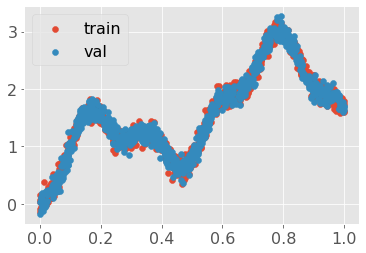

In [195]:
plt.figure()
plt.scatter(times, y[0], label='train')
plt.scatter(times_val, y_val[0], label='val')
plt.legend()

In [177]:
# goal:
# given the label e.g. mass-ratio produce the waveform at a specific set of time points
# input: 1
# output: T

In [199]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y.shape[1])
])

model.compile(loss='mse', optimizer='adam')

In [200]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_33 (Dense)             (None, 1000)              65000     
Total params: 65,128
Trainable params: 65,128
Non-trainable params: 0
_________________________________________________________________


In [201]:
%%time
history = model.fit(x, y, epochs=10000, verbose=0, validation_data=(x, y_val), validation_freq=100)

CPU times: user 17.5 s, sys: 3.45 s, total: 21 s
Wall time: 11.7 s


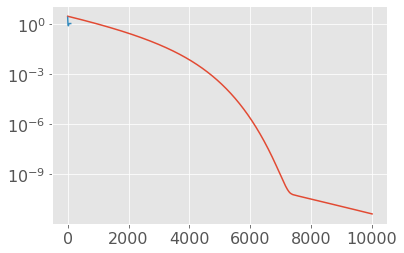

In [219]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.yscale('log')

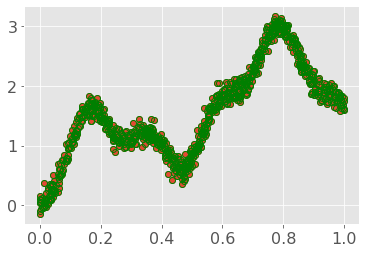

In [221]:
plt.figure()
plt.plot(times, y[0], 'o')
plt.plot(times, model.predict(x)[0],' go',markerfacecolor='none')

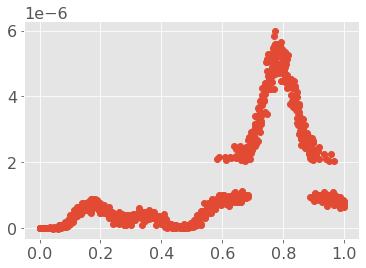

In [204]:
plt.figure()
plt.plot(times, y[0]-model.predict(x)[0], 'o')

In [205]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Reshape((64, 1)),
    tf.keras.layers.Conv1DTranspose(10, 10, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(y.shape[1])
])

model_conv.compile(loss='mse', optimizer='adam')

In [206]:
model_conv.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                128       
_________________________________________________________________
reshape_7 (Reshape)          (None, 64, 1)             0         
_________________________________________________________________
conv1d_transpose_8 (Conv1DTr (None, 73, 10)            110       
_________________________________________________________________
flatten_6 (Flatten)          (None, 730)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1000)              731000    
Total params: 731,238
Trainable params: 731,238
Non-trainable params: 0
_________________________________________________________________


In [207]:
%%time
history_conv = model_conv.fit(x, y, epochs=10000, verbose=0, validation_data=(x, y_val), validation_freq=100)

CPU times: user 50.4 s, sys: 5.37 s, total: 55.8 s
Wall time: 21.2 s


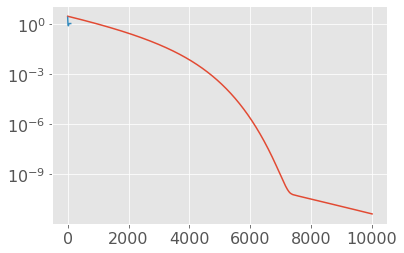

In [217]:
plt.figure()
plt.plot(history_conv.history['loss'], label='train')
plt.plot(history_conv.history['val_loss'], label='val')
plt.yscale('log')

In [209]:
model_conv.predict(x)[0].shape

(1000,)

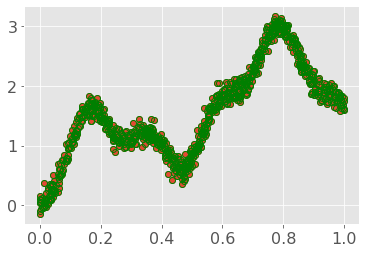

In [210]:
plt.figure()
plt.plot(times, y[0], 'o')
plt.plot(times, model_conv.predict(x)[0],' go',markerfacecolor='none')

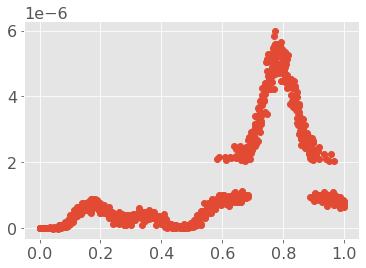

In [211]:
plt.figure()
plt.plot(times, y[0]-model_conv.predict(x)[0], 'o')

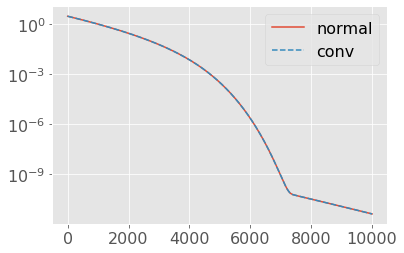

In [218]:
plt.figure()
plt.plot(history.history['loss'], label='normal')
plt.plot(history_conv.history['loss'], label='conv', ls='--')
plt.yscale('log')
plt.legend()

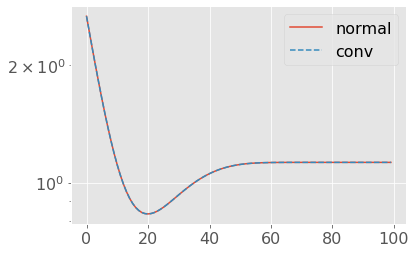

In [215]:
plt.figure()
plt.plot(history.history['val_loss'], label='normal')
plt.plot(history_conv.history['val_loss'], label='conv', ls='--')
plt.yscale('log')
plt.legend()

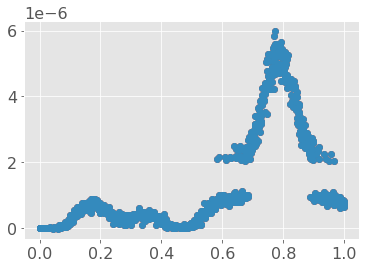

In [216]:
plt.figure()
plt.plot(times, y[0]-model.predict(x)[0], 'o')
plt.plot(times, y[0]-model_conv.predict(x)[0], 'o')

# try when x=[0,1], i.e. when you two mass-ratios

In [344]:
def gen_data_2(npts=50):
    x = np.random.uniform(0, 1, size=npts)
    
    y = np.zeros(shape=(3, npts))
    
    y[0] = 2*np.sin(2*x) + np.sin(10*x)**3
    y[0] += np.random.normal(0, 0.1, npts)
    
    y[1] = 4*np.sin(4*x) + np.sin(20*x)**3
    y[1] += np.random.normal(0, 0.1, npts)
    
    y[2] = 6.5*np.sin(6*x) + np.sin(30*x)**4
    y[2] += np.random.normal(0, 0.7, npts)
    
    return x, y

In [345]:
times, y = gen_data_2(npts=10000)

In [346]:
x = np.array([[0], [1], [2]])

In [347]:
y.shape

(3, 10000)

In [348]:
x.shape

(3, 1)

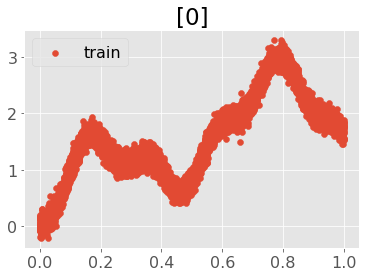

In [349]:
plt.figure()
plt.scatter(times, y[0], label='train')
plt.title(x[0])
plt.legend()

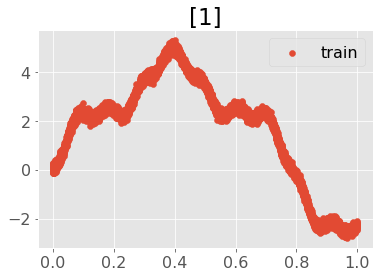

In [350]:
plt.figure()
plt.scatter(times, y[1], label='train')
plt.title(x[1])
plt.legend()

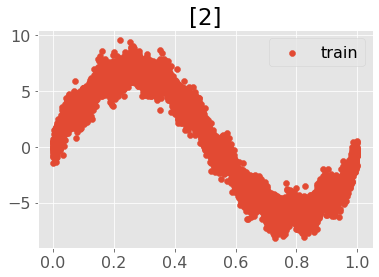

In [351]:
plt.figure()
plt.scatter(times, y[2], label='train')
plt.title(x[2])
plt.legend()

In [352]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(730, activation='relu'),
    tf.keras.layers.Dense(y.shape[1])
])

model.compile(loss='mse', optimizer='adam')

In [353]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_61 (Dense)             (None, 730)               47450     
_________________________________________________________________
dense_62 (Dense)             (None, 10000)             7310000   
Total params: 7,357,578
Trainable params: 7,357,578
Non-trainable params: 0
_________________________________________________________________


In [354]:
%%time

callbacks=[]    
threshold_callback = wispy.callbacks.ThresholdCallback(1e-11)
callbacks.append(threshold_callback)

history = model.fit(x, y, epochs=10000, verbose=0, callbacks=callbacks)

CPU times: user 31.2 s, sys: 26.7 s, total: 58 s
Wall time: 12.3 s


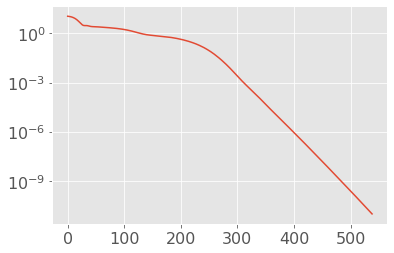

In [355]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.yscale('log')

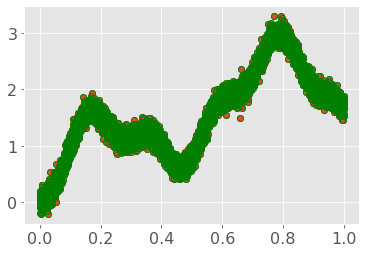

In [356]:
plt.figure()
plt.plot(times, y[0], 'o')
plt.plot(times, model.predict(x)[0],' go',markerfacecolor='none')

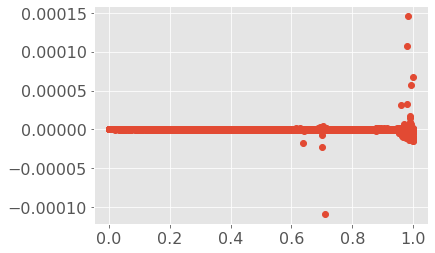

In [357]:
plt.figure()
plt.plot(times, y[0]-model.predict(x)[0], 'o')

In [358]:
# model_conv = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(1, )),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Reshape((64, 1)),
#     tf.keras.layers.Conv1DTranspose(10, 10, activation='relu'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(y.shape[1])
# ])

# model_conv.compile(loss='mse', optimizer='adam')

model_conv = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Reshape((64, 1)),
    tf.keras.layers.Conv1DTranspose(10, 10, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(y.shape[1])
])

model_conv.compile(loss='mse', optimizer='adam')

In [359]:
model_conv.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 64)                128       
_________________________________________________________________
reshape_12 (Reshape)         (None, 64, 1)             0         
_________________________________________________________________
conv1d_transpose_13 (Conv1DT (None, 73, 10)            110       
_________________________________________________________________
flatten_11 (Flatten)         (None, 730)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 10000)             7310000   
Total params: 7,310,238
Trainable params: 7,310,238
Non-trainable params: 0
_________________________________________________________________


In [360]:
%%time

callbacks=[]    
threshold_callback = wispy.callbacks.ThresholdCallback(1e-11)
callbacks.append(threshold_callback)

history_conv = model_conv.fit(x, y, epochs=10000, verbose=0, callbacks=callbacks)

CPU times: user 1min 17s, sys: 1min 6s, total: 2min 24s
Wall time: 30.9 s


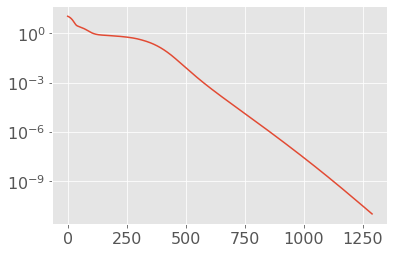

In [361]:
plt.figure()
plt.plot(history_conv.history['loss'], label='train')
plt.yscale('log')

In [362]:
model_conv.predict(x)[0].shape

(10000,)

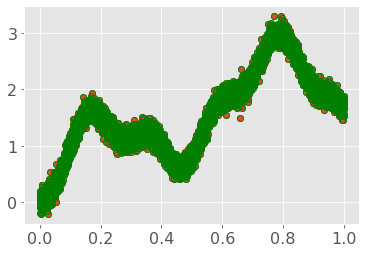

In [363]:
plt.figure()
plt.plot(times, y[0], 'o')
plt.plot(times, model_conv.predict(x)[0],' go',markerfacecolor='none')

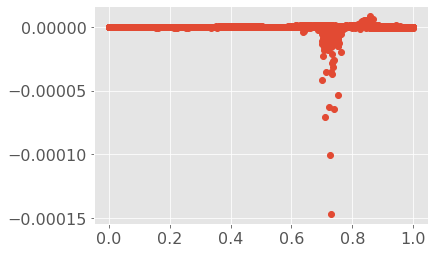

In [364]:
plt.figure()
plt.plot(times, y[0]-model_conv.predict(x)[0], 'o')

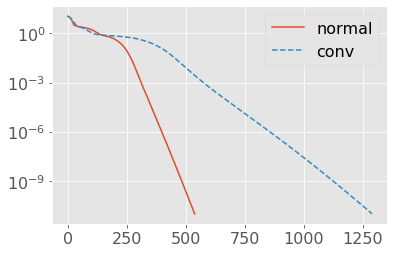

In [365]:
plt.figure()
plt.plot(history.history['loss'], label='normal')
plt.plot(history_conv.history['loss'], label='conv', ls='--')
plt.yscale('log')
plt.legend()

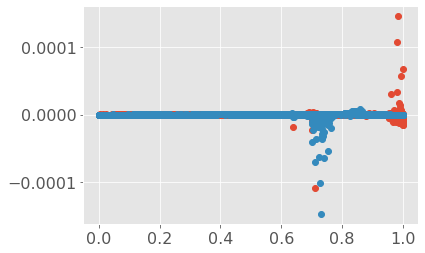

In [366]:
plt.figure()
plt.plot(times, y[0]-model.predict(x)[0], 'o')
plt.plot(times, y[0]-model_conv.predict(x)[0], 'o')

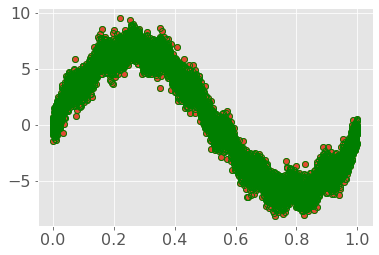

In [371]:
plt.figure()
plt.plot(times, y[2], 'o')
plt.plot(times, model_conv.predict(x)[2],' go',markerfacecolor='none')